In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt  # type: ignore
from sklearn import metrics
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer 

from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [8]:
import warnings

warnings.filterwarnings("ignore")

## Informação da base de dados

- Bases de dados com maior proporção de 0

In [9]:
df_train = pd.read_csv("../data/processing/df_train.csv")

df_train

,Unnamed: 0,PontosCredito,Idade,VinculoEmpresa,DinheiroRestante,NumProdutosComprados,CartaoCredito,MembroAtivo,SalarioEstimado,Pais_France,Pais_Germany,Pais_Spain,Sexo_Male,Sexo_Female,Churn
0,0,673,37,2,0.00,1,1,1,13624.02,1,0,0,1,0,0
1,1,731,43,9,79120.27,1,0,0,548.52,0,1,0,0,1,1
2,2,668,42,8,187534.79,1,1,1,32900.41,1,0,0,1,0,1
3,3,677,26,3,102395.79,1,1,0,119368.99,0,1,0,0,1,0
4,4,595,41,9,150463.11,2,0,1,81548.38,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,8495,768,54,8,69712.74,1,1,1,69381.05,1,0,0,1,0,0
8496,8496,682,58,1,0.00,1,1,1,706.50,1,0,0,0,1,0
8497,8497,735,38,1,0.00,3,0,0,92220.12,1,0,0,0,1,1
8498,8498,667,43,8,190227.46,1,1,0,97508.04,1,0,0,1,0,1


In [10]:
df_test = pd.read_csv("../data/processing/df_test.csv")

df_test

,Unnamed: 0,PontosCredito,Idade,VinculoEmpresa,DinheiroRestante,NumProdutosComprados,CartaoCredito,MembroAtivo,SalarioEstimado,Pais_Germany,Pais_France,Pais_Spain,Sexo_Male,Sexo_Female,Churn
0,0,596,32,3,96709.07,2,0,0,41788.37,1,0,0,1,0,0
1,1,623,43,1,0.00,2,1,1,146379.30,0,1,0,1,0,0
2,2,601,44,4,0.00,2,1,0,58561.31,0,0,1,0,1,0
3,3,506,59,8,119152.10,2,1,1,170679.74,1,0,0,1,0,0
4,4,560,27,7,124995.98,1,1,1,114669.79,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,637,34,9,0.00,2,0,0,26057.08,0,0,1,0,1,0
1496,1496,629,31,6,0.00,2,1,0,93881.75,0,1,0,1,0,0
1497,1497,665,25,7,90920.75,1,0,1,112256.57,0,1,0,1,0,0
1498,1498,469,48,5,0.00,1,1,0,160529.71,0,1,0,0,1,1


In [11]:
df_train.drop(columns="Unnamed: 0", inplace=True)
df_test.drop(columns="Unnamed: 0",inplace=True)

In [12]:
features = df_train.drop(columns="Churn").columns.to_list()
target = "Churn"

X_train = df_train[features]
X_test =  df_test[features]
y_train = df_train[target]
y_test = df_test[target]

# RandomForestClassifier

In [13]:
random_forest = RandomForestClassifier()

## BayesSearchCV

In [14]:
space = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(1, 10)
    
}

opt = BayesSearchCV(random_forest,
                    space,
                    n_iter=30,
                    random_state=42)

## Treino

In [15]:
opt.fit(X_train, y_train)

BayesSearchCV(estimator=RandomForestClassifier(), n_iter=30, random_state=42,
              search_spaces={'max_depth': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [16]:
predict_train = opt.predict(X_train)
predict_test = opt.predict(X_test)
proba_train = opt.predict_proba(X_train)
proba_test = opt.predict_proba(X_test)

In [17]:
train_acc = metrics.accuracy_score(y_train, predict_train)
test_acc = metrics.accuracy_score(y_test, predict_test)
train_roc = metrics.roc_auc_score(y_train, proba_train[:, 1])
test_roc = metrics.roc_auc_score(y_test, proba_test[:, 1])

In [18]:
print("Acc train:", train_acc)
print("Acc test:", test_acc)
print("Roc auc score:", train_roc)
print("Roc auc score:", test_roc)

Acc train: 0.8978823529411765
Acc test: 0.8586666666666667
Roc auc score: 0.9493910611566477
Roc auc score: 0.860155916426081


## Matriz de confusão

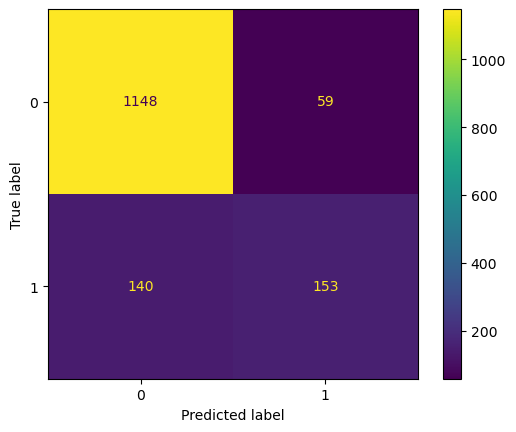

In [39]:
conf_matrix = metrics.confusion_matrix(y_test, predict_test)

metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

# XGBClassifier

In [20]:
xbg = XGBClassifier()

## BayesSearchCV

In [21]:
space = {
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(1e-6, 0.1, prior="log-uniform"),
    'gamma': Real(1e-6, 0.1, prior="log-uniform"),
    'min_child_weight': Integer(1, 10),
    'scale_pos_weight': Real(1e-6, 50, prior="log-uniform"),
    'max_depth': Integer(2, 12),
    'subsample': Real(0.6, 0.8),
    'colsample_bytree': Real(0.6, 0.8),
    'reg_alpha': Real(1e-6, 0.1, prior="log-uniform"), 
    'reg_lambda': Real(1e-6, 0.1, prior="log-uniform"),
    'objective': Categorical(['binary:logistic']),
}

opt = BayesSearchCV(xbg,
                    space,
                    n_iter=30,
                    random_state=42)

## Treino

In [22]:
opt.fit(X_train, y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
                             'objective': Categorical(categories=('binary:logistic',), prior=None),
                             'reg_alpha': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize'),
                             'scale_pos_weight': Real(low=1e-06, high=50, prior='log-uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=0.8, prior='uniform', transform='normalize')})

In [23]:
predict_train = opt.predict(X_train)
predict_test = opt.predict(X_test)
proba_train = opt.predict_proba(X_train)
proba_test = opt.predict_proba(X_test)

In [24]:
train_acc = metrics.accuracy_score(y_train, predict_train)
test_acc = metrics.accuracy_score(y_test, predict_test)
train_roc = metrics.roc_auc_score(y_train, proba_train[:, 1])
test_roc = metrics.roc_auc_score(y_test, proba_test[:, 1])

In [25]:
print("Acc train:", train_acc)
print("Acc test:", test_acc)
print("Roc auc score:", train_roc)
print("Roc auc score:", test_roc)

Acc train: 0.8755294117647059
Acc test: 0.8673333333333333
Roc auc score: 0.8924620096441627
Roc auc score: 0.8631390834466748


## Matriz de confusão

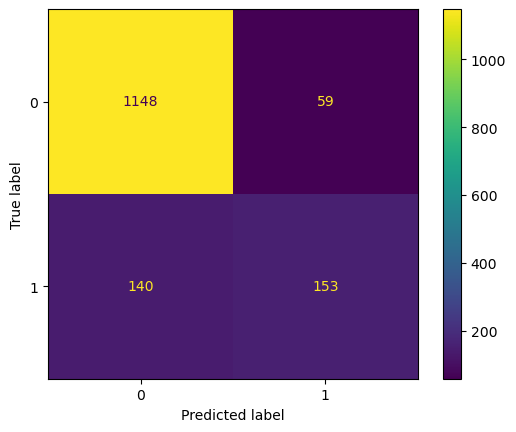

In [40]:
conf_matrix = metrics.confusion_matrix(y_test, predict_test)

metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

## Curva ROC

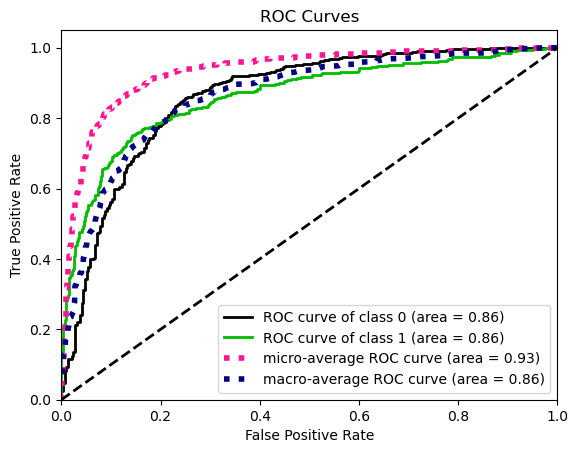

In [41]:
skplt.metrics.plot_roc(y_test, proba_test)
plt.show()

## Grafico de taxa de captura

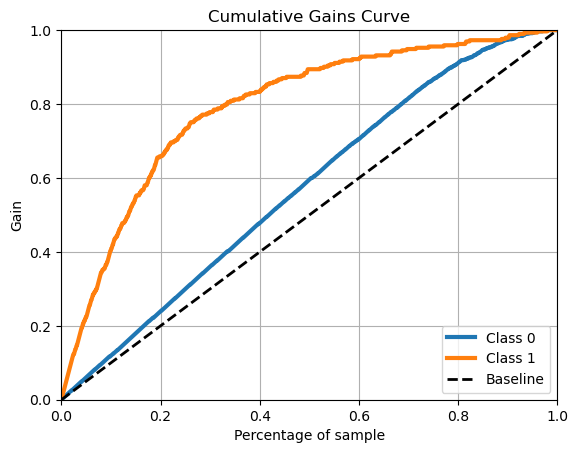

In [42]:
skplt.metrics.plot_cumulative_gain(y_test, proba_test)
plt.show()

- Com 20% da base ordenada com a maior probabilidade de dar churn foram capturados mais de 60% destes casos.

## Curva lift

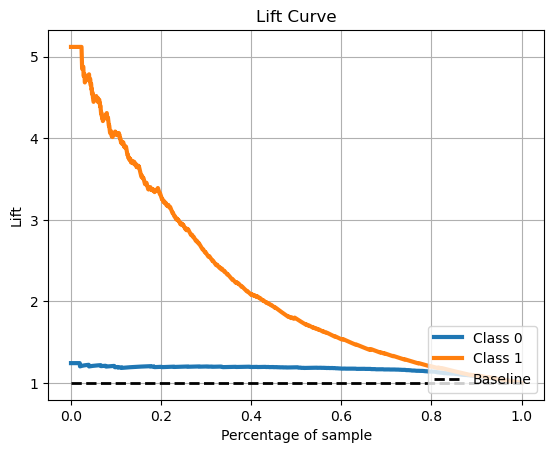

In [43]:
skplt.metrics.plot_lift_curve(y_test, proba_test)
plt.show()

- Com os 20% com mais chance de dar churn, o modelo esta com mais de 3 vezes de chance de acerto que um modelo aleatório.
- Modelo bom para priorizar clientes com alta probabilidade de saida.